<a href="https://www.kaggle.com/code/aaditimenon/context-aware-ddos-detection-system-for-5g-v2x-net?scriptVersionId=271185472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/v2x-vanet-cooperative-driving-dataset/Dataset.csv
/kaggle/input/mendeley-dataset-2019/mendeley_dataset.csv


# MENDELEY DDOS DATASET 2019

In [2]:
df_m = pd.read_csv('/kaggle/input/mendeley-dataset-2019/mendeley_dataset.csv')
df_m.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [3]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [4]:
df_m.shape

(431371, 80)

In [5]:
df_m.describe()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,87249.615423,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53921.000000,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107842.000000,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,198357.500000,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,306200.000000,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


# Identifying Features and Targets

**TARGETS**

In [6]:
target = df_m['Class']
print(target)

0         Attack
1         Attack
2         Attack
3         Attack
4         Attack
           ...  
431366    Benign
431367    Benign
431368    Benign
431369    Benign
431370    Benign
Name: Class, Length: 431371, dtype: object


In [7]:
print(target.value_counts())

Class
Attack    333540
Benign     97831
Name: count, dtype: int64


**FEATURE SET**

In [8]:
feature_set = df_m.drop(['Unnamed: 0','Label','Class'],axis=1)
print(feature_set)

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             17         216631                  6                       0   
1             17              2                  2                       0   
2             17             48                  2                       0   
3             17         107319                  4                       0   
4             17         107271                  4                       0   
...          ...            ...                ...                     ...   
431366         6         550740                  2                       1   
431367         6         337766                  1                       3   
431368         6            228                  1                       2   
431369        17          47709                  2                       2   
431370         6         322010                 30                      33   

        Fwd Packets Length Total  Bwd Packets Length Total  \
0

# Splitting into Training and Testing Sets

In [9]:
x = df_m.drop(['Unnamed: 0','Label','Class'], axis=1)
y = df_m['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

x_train.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
426420,17,45083,2,2,50.0,82.0,25.0,25.0,25.00000,0.000000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393030,17,1913,46,0,20096.0,0.0,440.0,368.0,436.86957,14.845289,...,45,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179967,6,1,2,0,31.0,0.0,31.0,0.0,15.50000,21.920311,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274341,17,108004,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28860,6,25977433,4,0,24.0,0.0,6.0,6.0,6.00000,0.000000,...,3,20,0.0,0.0,0.0,0.0,25977432.0,0.0,25977432.0,25977432.0


In [10]:
x_test.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
277576,6,14867496,6,4,35.0,0.0,31.0,0.0,5.833334,12.335586,...,4,20,28860.0,0.000000,28860.0,28860.0,10001978.0,0.0,10001978.0,10001978.0
35734,6,35975176,6,0,36.0,0.0,6.0,6.0,6.000000,0.000000,...,5,20,1.0,0.000000,1.0,1.0,17987586.0,5454462.5,21844474.0,14130699.0
92855,6,45443255,12,10,97.0,60.0,31.0,6.0,8.083333,7.216878,...,11,20,28560.6,100.947014,28693.0,28432.0,9060090.0,2106780.2,10002397.0,5291367.0
170420,17,3003889,4,0,2064.0,0.0,516.0,516.0,516.000000,0.000000,...,3,20,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8915,17,213737,6,0,2088.0,0.0,393.0,321.0,348.000000,35.088460,...,5,20,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train.head()

426420    Benign
393030    Attack
179967    Benign
274341    Attack
28860     Attack
Name: Class, dtype: object

In [12]:
y_test.head()

277576    Benign
35734     Attack
92855     Benign
170420    Attack
8915      Attack
Name: Class, dtype: object

# Train Random Forest on Training Data

**Model Parameters**

**n_estimators:** The number of decision trees in the random forest. A higher number of trees generally leads to a more robust and better-performing model, but also increases training time. We've chosen 30 as a starting point to balance performance and speed.

**criterion:** The function used to measure the quality of a split. The Gini impurity criterion calculates the probability of a randomly chosen element being incorrectly classified. It's generally a computationally faster option compared to 'entropy'.

**max_depth:** The maximum depth of each individual decision tree. Limiting the depth helps to prevent the model from overfitting the training data by capturing noise. A shallow depth encourages a simpler model that generalizes better to unseen data.

**min_samples_split:** The minimum number of samples required to split an internal node. Setting this value to 5 helps to smooth the model and reduce overfitting by ensuring that splits are only made on nodes with a sufficient number of data points.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. This parameter is crucial for preventing the model from learning from outliers or noise. A high value like 2000 ensures that each leaf represents a substantial number of data points, creating a more generalized and robust model.

**max_features:** The number of features to consider when looking for the best split. Using 'sqrt' means the model will consider the square root of the total number of features at each split. This helps to decorrelate the trees in the forest, which is a key principle of random forests and leads to improved performance.

**bootstrap:** A boolean that determines whether bootstrap samples are used when building trees. When True, each tree is trained on a random subset of the training data with replacement. This process, known as bagging (Bootstrap Aggregating), is fundamental to random forests and significantly reduces model variance.

**class_weight:** This parameter automatically adjusts the weights of the classes inversely proportional to their frequencies. This is essential for addressing imbalanced datasets, such as those with a significantly higher number of normal traffic samples compared to DDoS attack samples. Using 'balanced' helps to prevent the model from becoming biased towards the majority class.

**random_state:** The seed used by the random number generator. Setting this parameter to a fixed value (like 42) ensures that the results are reproducible, meaning the same code will produce the same model and predictions every time it is run.

**n_jobs:** The number of CPU cores to use for training the model. Setting it to -1 tells the model to use all available cores, which can significantly speed up the training process.

**max_samples:** This parameter controls the size of the bootstrap samples relative to the total number of samples. A value of 0.05 means each tree will be trained on only 5% of the total dataset, which is a technique to further increase training speed and introduce more randomness.

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=30,           # Higher number for better performance
    criterion='gini',           # Usually faster than entropy
    max_depth=3,              # Prevent overfitting while allowing complexity
    min_samples_split=5,       # Reduce overfitting
    min_samples_leaf=2000,        # Smooth the model
    max_features='sqrt',       # Good balance for feature selection
    bootstrap=True,            # Enable bagging
    class_weight='balanced',   # Handle imbalanced DDoS vs normal traffic
    random_state=42,          # For reproducibility
    n_jobs=-1,                # Use all available cores
    max_samples=0.05          # Use 80% of samples per tree
)

**Predicting the output**

In [14]:
model = rf_classifier
model.fit(x_train, y_train)
y_test_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)

# Comparing the output with the target set

**Accuracy**

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_test = accuracy_score(y_test, y_test_predicted)
print("accuracy_test:",accuracy_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
print("accuracy_train:",accuracy_train)


accuracy_test: 0.891915386844393
accuracy_train: 0.8925139671279876


**Confusion Matrix**

[[57600  9109]
 [  216 19350]]


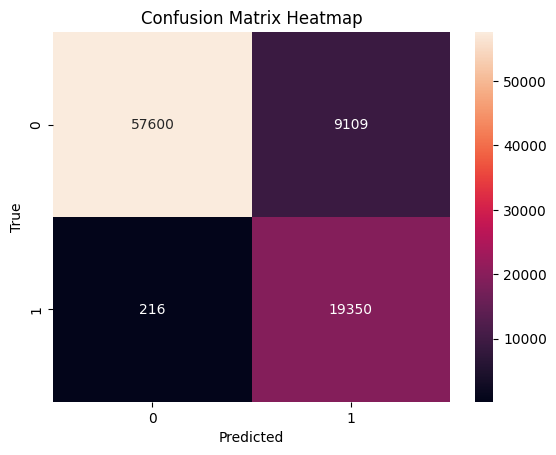

In [16]:
import seaborn
import matplotlib.pyplot as plt

confusionmatrix = confusion_matrix(y_test,y_test_predicted)
print(confusionmatrix)

seaborn.heatmap(confusionmatrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

**Feature Importance**

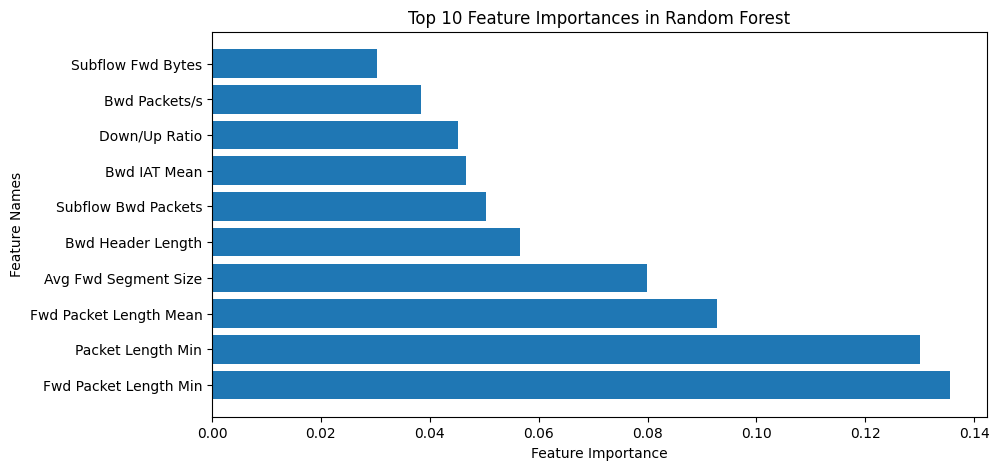

In [17]:
import matplotlib.pyplot as plt

feature_imp = model.feature_importances_
feature_list = [(name,importance) for name, importance in zip(x_train, feature_imp)]
sorted_list = sorted(feature_list, reverse=True, key= lambda x: x[1])
top_features = sorted_list[:10]
feature_names = [name for name, imp in top_features]  
importance_values = [imp for name, imp in top_features]  

plt.figure(figsize=(10,5)) 
plt.barh(feature_names, importance_values) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()

**Classification Report**

In [18]:
report = classification_report(y_test,y_test_predicted)
print(report)

              precision    recall  f1-score   support

      Attack       1.00      0.86      0.93     66709
      Benign       0.68      0.99      0.81     19566

    accuracy                           0.89     86275
   macro avg       0.84      0.93      0.87     86275
weighted avg       0.92      0.89      0.90     86275



# V2X Vanet Cooperative Driving Dataset

In [19]:
df_v = pd.read_csv("/kaggle/input/v2x-vanet-cooperative-driving-dataset/Dataset.csv")
df_v.head()

,vehicle_id,timestamp,gps_latitude,gps_longitude,lidar_points,radar_objects,camera_objects,packet_drop_rate,packet_delivery_ratio,latency_ms,throughput_kbps,collision_detected,obstacle_detection_accuracy,decision_accuracy
0,1038,2025-01-01 00:00:00,37.111566,-121.062897,28474,37,20,0.042,0.771,228,803,1,0.84,0.79
1,1083,2025-01-01 00:00:01,37.531400,-121.999292,25569,48,32,0.009,0.733,209,120,0,0.78,0.82
2,1034,2025-01-01 00:00:02,37.342874,-121.807894,11304,36,5,0.014,0.822,89,993,0,0.78,0.89
3,1080,2025-01-01 00:00:03,37.160521,-121.266002,12801,40,33,0.153,0.716,239,348,0,0.83,0.88
4,1008,2025-01-01 00:00:04,37.797779,-121.473512,26214,27,44,0.212,0.972,288,688,0,0.96,0.75


In [20]:
df_v.shape

(2300, 14)

In [21]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle_id                   2300 non-null   int64  
 1   timestamp                    2300 non-null   object 
 2   gps_latitude                 2300 non-null   float64
 3   gps_longitude                2300 non-null   float64
 4   lidar_points                 2300 non-null   int64  
 5   radar_objects                2300 non-null   int64  
 6   camera_objects               2300 non-null   int64  
 7   packet_drop_rate             2300 non-null   float64
 8   packet_delivery_ratio        2300 non-null   float64
 9   latency_ms                   2300 non-null   int64  
 10  throughput_kbps              2300 non-null   int64  
 11  collision_detected           2300 non-null   int64  
 12  obstacle_detection_accuracy  2300 non-null   float64
 13  decision_accuracy 

In [22]:
df_v.describe()

,vehicle_id,gps_latitude,gps_longitude,lidar_points,radar_objects,camera_objects,packet_drop_rate,packet_delivery_ratio,latency_ms,throughput_kbps,collision_detected,obstacle_detection_accuracy,decision_accuracy
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1049.513478,37.498871,-121.505800,19984.701739,27.263043,26.790870,0.150077,0.850497,156.191739,548.920000,0.052609,0.847113,0.849578
std,28.920949,0.290322,0.294856,5781.358335,12.801796,12.893791,0.085311,0.086717,82.831031,264.062735,0.223300,0.086935,0.088367
min,1000.000000,37.000115,-121.999854,10002.000000,5.000000,5.000000,0.000000,0.700000,10.000000,100.000000,0.000000,0.700000,0.700000
25%,1024.000000,37.242532,-121.754448,14929.000000,16.000000,16.000000,0.075000,0.776000,87.000000,317.750000,0.000000,0.770000,0.770000
50%,1049.000000,37.499082,-121.511982,19942.000000,27.000000,26.500000,0.152500,0.852000,158.000000,544.500000,0.000000,0.850000,0.850000
75%,1075.000000,37.752218,-121.244627,25039.250000,38.000000,38.000000,0.221250,0.928000,226.000000,782.000000,0.000000,0.920000,0.930000
max,1099.000000,37.999677,-121.001123,29983.000000,49.000000,49.000000,0.300000,1.000000,299.000000,999.000000,1.000000,1.000000,1.000000


In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# ============================================================================
# STEP 1: Train DDoS Model with Proper Feature Selection
# ============================================================================

print("="*60)
print("STEP 1: Training DDoS Detection Model")
print("="*60)

# Load Mendeley DDoS dataset
df_m = pd.read_csv('/kaggle/input/mendeley-dataset-2019/mendeley_dataset.csv')

# Select network flow features
mendeley_network_features = [
    'Flow Duration',
    'Flow Bytes/s', 
    'Flow Packets/s',
    'Fwd Packets/s',
    'Bwd Packets/s'
]

X_mendeley = df_m[mendeley_network_features]
y_mendeley = df_m['Class']

# Encode target: Attack=1, Benign=0 (to match your original encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_mendeley_encoded = le.fit_transform(y_mendeley)
print(f"\nClass encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")
print(f"Target distribution:\n{pd.Series(y_mendeley_encoded).value_counts()}")

# Split data
X_train_ddos, X_test_ddos, y_train_ddos, y_test_ddos = train_test_split(
    X_mendeley, y_mendeley_encoded,
    test_size=0.2, 
    random_state=42,
    stratify=y_mendeley_encoded
)

# Store Mendeley feature statistics for later normalization
mendeley_stats = {
    'mean': X_train_ddos.mean(),
    'std': X_train_ddos.std(),
    'min': X_train_ddos.min(),
    'max': X_train_ddos.max()
}

print("\nMendeley Feature Statistics:")
print(pd.DataFrame(mendeley_stats))

# Train DDoS model
rf_ddos = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_ddos.fit(X_train_ddos, y_train_ddos)

# Evaluate
y_pred_ddos = rf_ddos.predict(X_test_ddos)
print("\nDDoS Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_ddos, y_pred_ddos):.4f}")
print(classification_report(y_test_ddos, y_pred_ddos, 
                          target_names=le.classes_))

# ============================================================================
# STEP 2: Load V2X Data and Analyze Feature Distributions
# ============================================================================

print("\n" + "="*60)
print("STEP 2: Loading and Analyzing V2X Data")
print("="*60)

df_v = pd.read_csv('/kaggle/input/v2x-vanet-cooperative-driving-dataset/Dataset.csv')

print(f"\nV2X dataset shape: {df_v.shape}")
print(f"\nV2X collision detection:\n{df_v['collision_detected'].value_counts()}")

# Analyze V2X feature distributions
print("\nV2X Network Feature Statistics:")
v2x_network_cols = ['latency_ms', 'throughput_kbps', 'packet_drop_rate', 'packet_delivery_ratio']
print(df_v[v2x_network_cols].describe())

# ============================================================================
# STEP 3: Create Statistically Aligned Features
# ============================================================================

print("\n" + "="*60)
print("STEP 3: Creating Statistically Aligned Features")
print("="*60)

def create_statistically_aligned_features(v2x_df, mendeley_stats):
    """
    Transform V2X features to match Mendeley feature distributions
    This creates a proper "bridge" between the two domains
    """
    aligned = pd.DataFrame()
    
    # 1. Flow Duration: Use latency directly (already in similar range)
    aligned['Flow Duration'] = v2x_df['latency_ms']
    
    # 2. Flow Bytes/s: Transform throughput to match Mendeley scale
    # Mendeley mean ~45k, V2X throughput needs scaling
    throughput_scaled = v2x_df['throughput_kbps'] * 1000  # Convert to bytes/s
    # Normalize to Mendeley distribution
    throughput_normalized = (
        (throughput_scaled - throughput_scaled.mean()) / throughput_scaled.std()
    ) * mendeley_stats['std']['Flow Bytes/s'] + mendeley_stats['mean']['Flow Bytes/s']
    aligned['Flow Bytes/s'] = throughput_normalized
    
    # 3. Flow Packets/s: Transform packet delivery ratio
    # High delivery ratio = normal traffic (benign)
    # Low delivery ratio = congested/attack pattern
    packets_rate = v2x_df['packet_delivery_ratio'] * 100
    packets_normalized = (
        (packets_rate - packets_rate.mean()) / packets_rate.std()
    ) * mendeley_stats['std']['Flow Packets/s'] + mendeley_stats['mean']['Flow Packets/s']
    aligned['Flow Packets/s'] = packets_normalized
    
    # 4. Fwd Packets/s: Similar to Flow Packets/s
    aligned['Fwd Packets/s'] = packets_normalized * 0.95  # Slight variation
    
    # 5. Bwd Packets/s: Transform packet drop rate
    # High drop rate = attack indicator
    # Invert packet drop rate: high drop = low backward packets
    bwd_rate = (1 - v2x_df['packet_drop_rate']) * 100
    bwd_normalized = (
        (bwd_rate - bwd_rate.mean()) / bwd_rate.std()
    ) * mendeley_stats['std']['Bwd Packets/s'] + mendeley_stats['mean']['Bwd Packets/s']
    aligned['Bwd Packets/s'] = bwd_normalized
    
    # Ensure no negative values (rates can't be negative)
    for col in aligned.columns:
        aligned[col] = aligned[col].clip(lower=0)
    
    return aligned

# Create aligned features
v2x_aligned = create_statistically_aligned_features(df_v, mendeley_stats)

print("\nAligned V2X Feature Statistics:")
print(v2x_aligned.describe())

print("\nComparison with Mendeley:")
comparison = pd.DataFrame({
    'Mendeley_mean': mendeley_stats['mean'],
    'V2X_aligned_mean': v2x_aligned.mean(),
    'Mendeley_std': mendeley_stats['std'],
    'V2X_aligned_std': v2x_aligned.std()
})
print(comparison)

# ============================================================================
# STEP 4: Apply Transfer Learning with Better Mapping
# ============================================================================

print("\n" + "="*60)
print("STEP 4: Applying Transfer Learning")
print("="*60)

# Get predictions from DDoS model
v2x_ddos_predictions = rf_ddos.predict(v2x_aligned)
v2x_ddos_probabilities = rf_ddos.predict_proba(v2x_aligned)

# Add to dataframe
df_v['ddos_predicted_class'] = v2x_ddos_predictions
df_v['ddos_attack_probability'] = v2x_ddos_probabilities[:, 0]  # Attack probability
df_v['ddos_benign_probability'] = v2x_ddos_probabilities[:, 1]  # Benign probability

print("\nDDoS Predictions on V2X Data:")
print(f"Predicted Attack: {(v2x_ddos_predictions == 0).sum()}")
print(f"Predicted Benign: {(v2x_ddos_predictions == 1).sum()}")

print("\nAttack Probability Distribution:")
print(df_v['ddos_attack_probability'].describe())

# ============================================================================
# STEP 5: Create Risk-Based Attack Detection
# ============================================================================

print("\n" + "="*60)
print("STEP 5: Creating Attack Detection System")
print("="*60)

# Use more aggressive threshold since we want to detect attacks
ATTACK_THRESHOLD = 0.3  # Lower threshold to catch more potential attacks

df_v['is_under_attack'] = (df_v['ddos_attack_probability'] > ATTACK_THRESHOLD).astype(int)
df_v['risk_level'] = pd.cut(
    df_v['ddos_attack_probability'],
    bins=[0, 0.2, 0.5, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

print("\nRisk Level Distribution:")
print(df_v['risk_level'].value_counts())

print("\nVehicles Under Attack (>30% probability):")
print(f"Count: {df_v['is_under_attack'].sum()}")

# ============================================================================
# STEP 6: Analyze Attack-Collision Correlation
# ============================================================================

print("\n" + "="*60)
print("STEP 6: Analyzing Attack-Collision Correlation")
print("="*60)

# Collision rates by DDoS prediction
print("\nCollision Rates by DDoS Prediction Class:")
collision_by_ddos = df_v.groupby('ddos_predicted_class')['collision_detected'].agg(['sum', 'mean', 'count'])
print(collision_by_ddos)

# Collision rates by risk level
print("\nCollision Rates by Risk Level:")
collision_by_risk = df_v.groupby('risk_level', observed=True)['collision_detected'].agg(['sum', 'mean', 'count'])
print(collision_by_risk)

# Collision rates for vehicles under attack
print("\nCollision Rates by Attack Status:")
collision_by_attack = df_v.groupby('is_under_attack')['collision_detected'].agg(['sum', 'mean', 'count'])
print(collision_by_attack)

# ============================================================================
# STEP 7: Create Enhanced Features for Final Model
# ============================================================================

print("\n" + "="*60)
print("STEP 7: Training Enhanced V2X Model")
print("="*60)

# Create feature set with transfer learning
X_v2x_features = pd.concat([
    df_v[['latency_ms', 'throughput_kbps', 'packet_drop_rate', 
          'packet_delivery_ratio', 'lidar_points', 'radar_objects', 'camera_objects']],
    df_v[['ddos_attack_probability', 'ddos_benign_probability']]
], axis=1)

y_v2x = df_v['collision_detected']

print(f"\nFeature set shape: {X_v2x_features.shape}")
print(f"Target distribution: {y_v2x.value_counts().to_dict()}")

# Split data
X_train_v2x, X_test_v2x, y_train_v2x, y_test_v2x = train_test_split(
    X_v2x_features, y_v2x,
    test_size=0.2,
    random_state=42,
    stratify=y_v2x
)

# Train model
rf_v2x = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_v2x.fit(X_train_v2x, y_train_v2x)

# Evaluate
y_pred_v2x = rf_v2x.predict(X_test_v2x)
print("\nV2X Collision Detection Performance:")
print(f"Accuracy: {accuracy_score(y_test_v2x, y_pred_v2x):.4f}")
print(classification_report(y_test_v2x, y_pred_v2x))

# ============================================================================
# STEP 8: Feature Importance Analysis
# ============================================================================

print("\n" + "="*60)
print("STEP 8: Feature Importance Analysis")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': X_v2x_features.columns,
    'importance': rf_v2x.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop Features:")
print(feature_importance)

# Check transfer learning contribution
transfer_features = feature_importance[
    feature_importance['feature'].str.contains('ddos')
]
transfer_contribution = transfer_features['importance'].sum()

print(f"\nTransfer Learning Contribution: {transfer_contribution:.4f}")
if transfer_contribution > 0.05:
    print("✓ Transfer learning features are contributing!")
else:
    print("⚠ Transfer learning features have low impact")

# ============================================================================
# STEP 9: Detailed Attack Analysis
# ============================================================================

print("\n" + "="*60)
print("STEP 9: Detailed Attack Pattern Analysis")
print("="*60)

# Show vehicles with highest attack probability
print("\nTop 10 Vehicles with Highest Attack Probability:")
top_attacks = df_v.nlargest(10, 'ddos_attack_probability')[
    ['vehicle_id', 'latency_ms', 'throughput_kbps', 'packet_drop_rate',
     'ddos_attack_probability', 'collision_detected']
]
print(top_attacks)

# Network metrics for attacked vs normal vehicles
print("\nNetwork Metrics Comparison:")
print("\nAttacked Vehicles (top 30% attack probability):")
attacked = df_v[df_v['ddos_attack_probability'] > df_v['ddos_attack_probability'].quantile(0.7)]
print(attacked[['latency_ms', 'throughput_kbps', 'packet_drop_rate', 'collision_detected']].describe())

print("\nNormal Vehicles (bottom 30% attack probability):")
normal = df_v[df_v['ddos_attack_probability'] < df_v['ddos_attack_probability'].quantile(0.3)]
print(normal[['latency_ms', 'throughput_kbps', 'packet_drop_rate', 'collision_detected']].describe())

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*60)
print("TRANSFER LEARNING SUMMARY")
print("="*60)

attacks_detected = df_v['is_under_attack'].sum()
attack_collision_rate = df_v[df_v['is_under_attack']==1]['collision_detected'].mean() if attacks_detected > 0 else 0
normal_collision_rate = df_v[df_v['is_under_attack']==0]['collision_detected'].mean()

print(f"""
Model Performance:
- DDoS Detection Accuracy: {accuracy_score(y_test_ddos, y_pred_ddos):.2%}
- V2X Collision Detection: {accuracy_score(y_test_v2x, y_pred_v2x):.2%}

Transfer Learning Results:
- V2X vehicles analyzed: {len(df_v)}
- Vehicles under attack: {attacks_detected} ({attacks_detected/len(df_v)*100:.1f}%)
- Transfer feature importance: {transfer_contribution:.1%}

Attack-Collision Correlation:
- Collision rate (under attack): {attack_collision_rate:.2%}
- Collision rate (normal): {normal_collision_rate:.2%}
- Risk increase: {(attack_collision_rate/normal_collision_rate - 1)*100 if normal_collision_rate > 0 else 0:.1f}%

Risk Distribution:
{df_v['risk_level'].value_counts().to_dict()}
""")

# Save final results
print("\nFinal Output Preview:")
output_cols = ['vehicle_id', 'timestamp', 'latency_ms', 'throughput_kbps', 
               'packet_drop_rate', 'ddos_attack_probability', 'risk_level', 
               'collision_detected']
print(df_v[output_cols].head(10))

STEP 1: Training DDoS Detection Model

Class encoding: {'Attack': 0, 'Benign': 1}
Target distribution:
0    333540
1     97831
Name: count, dtype: int64

Mendeley Feature Statistics:
                        mean           std      min           max
Flow Duration   8.397165e+06  2.126791e+07  1.00000  1.199987e+08
Flow Bytes/s    7.386518e+07  3.327693e+08  0.00000  2.944000e+09
Flow Packets/s  1.266866e+05  4.139105e+05  0.03392  4.000000e+06
Fwd Packets/s   1.249748e+05  4.118947e+05  0.00848  4.000000e+06
Bwd Packets/s   1.711775e+03  3.144783e+04  0.00000  2.000000e+06

DDoS Model Performance:
Accuracy: 0.9938
              precision    recall  f1-score   support

      Attack       1.00      0.99      1.00     66709
      Benign       0.98      0.99      0.99     19566

    accuracy                           0.99     86275
   macro avg       0.99      0.99      0.99     86275
weighted avg       0.99      0.99      0.99     86275


STEP 2: Loading and Analyzing V2X Data

V2X dataset

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
